<img src="" >

# **Time Series Analysis of Daily Steps Data**

- **Mlondi**

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Test seasonality and Stationarity](#features)
6. [Model Selection](#model)
7. [Forecasting](#tuning)
8. [Conclusion](#conclusion)
9. [References](#references)

<a id="intro"></a>
# 1. **Introduction**

#### **Objective**

1. Explore the overall trends in daily steps taken by the individual.
2. Identify any seasonality or recurring pa:erns in the data.
3. Forecast the time series and test the fitness of it.

<a id="data"></a>
# 2. **Data Collection**

Dataset: The fitness dataset comprises daily steps measurements for 15 months. It includes 
the following variables:
1. **Date:** The date of the measurement.
2. **Steps:** The number of step
3. **Goal:** A daily steps goal

# **Importing Libraries**

In [86]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib
%matplotlib inline

<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:


1. Table merging process.
2. Checking and dealing with missing values.

- We read and merge the 15 files into one DataFrame.

In [87]:
# Reading all data files
df = pd.DataFrame({})

for i in range(1,16):
    path = 'Steps'+str(i)+'.csv'
    df_temp = pd.read_csv(path)
    df = pd.concat([df,df_temp], axis = 0)
    
df.head()

,Date,Actual,Goal
0,May 31 2022,0,8000
1,Jun 1 2022,0,8000
2,Jun 2 2022,0,8000
3,Jun 3 2022,1102,8000
4,Jun 4 2022,1254,8000


In [88]:
# converting the date to an appropriate date format 
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b %d %Y').strftime('%Y-%m-%d'))
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
# Replacing zeros as nulls
#df = df.replace(0, np.NaN)

In [90]:
# Day feature for imputing null values
#df['day'] = df['Date'].str[8:]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    420 non-null    datetime64[ns]
 1   Actual  420 non-null    int64         
 2   Goal    420 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 13.1 KB


In [92]:
# set_date index
df = df.set_index('Date', drop = True)

In [93]:
df.head()

,Actual,Goal
Date,,
2022-05-31,0,8000
2022-06-01,0,8000
2022-06-02,0,8000
2022-06-03,1102,8000
2022-06-04,1254,8000


In [94]:
# Visualize missing values as a matrix
#msno.matrix(df)

In [95]:
#df_temp = df.groupby('day').mean('Actual')

In [96]:
#df_temp

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

An Exploratory Data Analysis is a thorough examination meant to uncover the underlying structure of a data set because it exposes trends, patterns, and relationships that are not readily apparent.

In [97]:
df.describe()

,Actual,Goal
count,420.000000,420.000000
mean,5674.140476,7682.142857
std,2930.565439,613.717635
min,0.000000,6500.000000
25%,3634.000000,8000.000000
50%,5402.000000,8000.000000
75%,7349.000000,8000.000000
max,16611.000000,8000.000000


- Most Goal values are 8000. The Actual has a variety of values.

In [98]:
import plotly.express as px

fig = px.line(df, x=df.index, y="Actual", title='Actual Steps with time')
fig.show()

<a id="features"></a>
## 5. **Test seasonality and Stationarity**

In [99]:
y = df['Actual']

In [100]:
y = df['Actual'].resample('MS').mean()

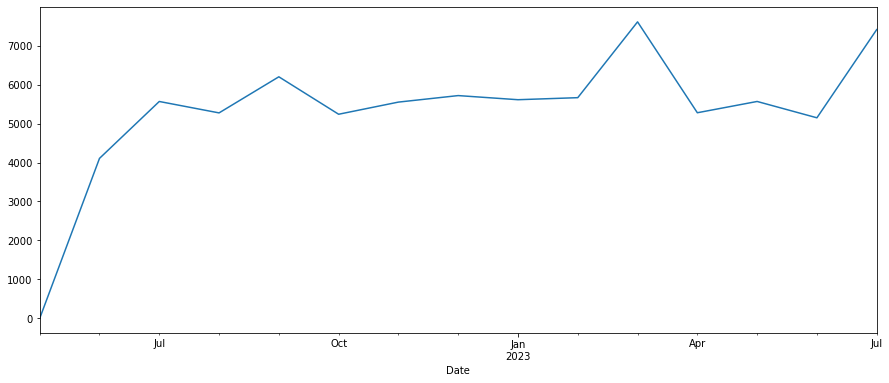

In [101]:
y.plot(figsize=(15, 6))
plt.show()

In [102]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


ValueError: x must have 2 complete cycles requires 24 observations. x only has 15 observation(s)

<a id="model"></a>
## 6. **Model Selection**

<a id="evaluation"></a>
## 7. **Forecasting**

<a id="conclusion"></a>
## 8. **Conclusion**

<a id="references"></a>
## 9. **References**